### Problem Statement: 
#### This is an Regression project. The primary goal is to model energy production as a function of environmental variables
####  We have the following variables for this analysis:
- **distance_to_solar_noon**, in radians.
- **temperature**-daily average temperature, in degrees Celsius.
- **wind_direction**- daily average wind direction, in degrees (0-360).
- **wind_speed**-daily average wind speed, in meters per second.
- **sky_cover**-on a five-step scale from 0 to 4, with 0 completely clear and 4 wholly covered.
- **visibility**-in kilometers.
- **humidity**-in percentage.
- **average_wind_speed**-average wind speed during the 3 hours de measure was taken in meters per second.
- **average_pressure**-average barometric pressure during the 3 hours the measure was taken in, in mercury inches.
- **power_generated(Target)**- in Jules for each 3 hours


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_theme(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=True, rc=None)

import warnings
warnings.filterwarnings('ignore')

### EDA

In [2]:
df=pd.read_csv('solarpowergeneration.csv')

In [3]:
df.head()

,distance-to-solar-noon,temperature,wind-direction,wind-speed,sky-cover,visibility,humidity,average-wind-speed-(period),average-pressure-(period),power-generated
0,0.859897,69,28,7.5,0,10.0,75,8.0,29.82,0
1,0.628535,69,28,7.5,0,10.0,77,5.0,29.85,0
2,0.397172,69,28,7.5,0,10.0,70,0.0,29.89,5418
3,0.165810,69,28,7.5,0,10.0,33,0.0,29.91,25477
4,0.065553,69,28,7.5,0,10.0,21,3.0,29.89,30069


In [4]:
df=df.rename(columns={'distance-to-solar-noon':'dist','temperature':'temp','wind-direction':'winddir','wind-speed':'windspd','average-wind-speed-(period)':'avg_wind_spd','average-pressure-(period)':'avg_pressure',})

In [56]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
dist,2919.0,0.503327,0.298069,0.050401,0.232061,0.479241,0.739559,1.141361
temp,2919.0,58.468996,6.842318,42.000000,53.000000,59.000000,63.000000,78.000000
winddir,2919.0,24.957862,6.912203,1.000000,25.000000,27.000000,29.000000,36.000000
windspd,2919.0,10.099486,4.837128,1.100000,6.600000,10.000000,13.100000,26.600000
sky-cover,2919.0,1.987667,1.412220,0.000000,1.000000,2.000000,3.000000,4.000000
visibility,2919.0,9.559609,1.380290,0.000000,10.000000,10.000000,10.000000,10.000000
humidity,2919.0,73.505995,15.073974,14.000000,65.000000,77.000000,84.000000,100.000000
avg_wind_spd,2919.0,10.129154,7.261547,0.000000,5.000000,9.000000,15.000000,40.000000
avg_pressure,2919.0,30.017712,0.142006,29.480000,29.920000,30.000000,30.110000,30.530000
power-generated,2919.0,6982.182939,10313.330078,0.000000,0.000000,404.000000,12725.000000,36580.000000


In [6]:
missing_values=df.isnull().sum()
missing_values

dist               0
temp               0
winddir            0
windspd            0
sky-cover          0
visibility         0
humidity           0
avg_wind_spd       1
avg_pressure       0
power-generated    0
dtype: int64

In [7]:
df[df.isnull().any(axis=1)]


,dist,temp,winddir,windspd,sky-cover,visibility,humidity,avg_wind_spd,avg_pressure,power-generated
714,0.406143,57,12,2.8,2,4.0,96,NaN,30.16,159


In [8]:
df=df.dropna()   # Deal with Null values.

In [9]:
df.isna().sum()

dist               0
temp               0
winddir            0
windspd            0
sky-cover          0
visibility         0
humidity           0
avg_wind_spd       0
avg_pressure       0
power-generated    0
dtype: int64

In [10]:
df

,dist,temp,winddir,windspd,sky-cover,visibility,humidity,avg_wind_spd,avg_pressure,power-generated
0,0.859897,69,28,7.5,0,10.0,75,8.0,29.82,0
1,0.628535,69,28,7.5,0,10.0,77,5.0,29.85,0
2,0.397172,69,28,7.5,0,10.0,70,0.0,29.89,5418
3,0.165810,69,28,7.5,0,10.0,33,0.0,29.91,25477
4,0.065553,69,28,7.5,0,10.0,21,3.0,29.89,30069
...,...,...,...,...,...,...,...,...,...,...
2915,0.166453,63,27,13.9,4,10.0,75,10.0,29.93,6995
2916,0.064020,63,27,13.9,1,10.0,66,15.0,29.91,29490
2917,0.294494,63,27,13.9,2,10.0,68,21.0,29.88,17257
2918,0.524968,63,27,13.9,2,10.0,81,17.0,29.87,677


In [11]:
df['avg_pressure'].unique().max()

30.53

In [12]:
data_types=df.dtypes
data_types

dist               float64
temp                 int64
winddir              int64
windspd            float64
sky-cover            int64
visibility         float64
humidity             int64
avg_wind_spd       float64
avg_pressure       float64
power-generated      int64
dtype: object

In [13]:
df.shape

(2919, 10)

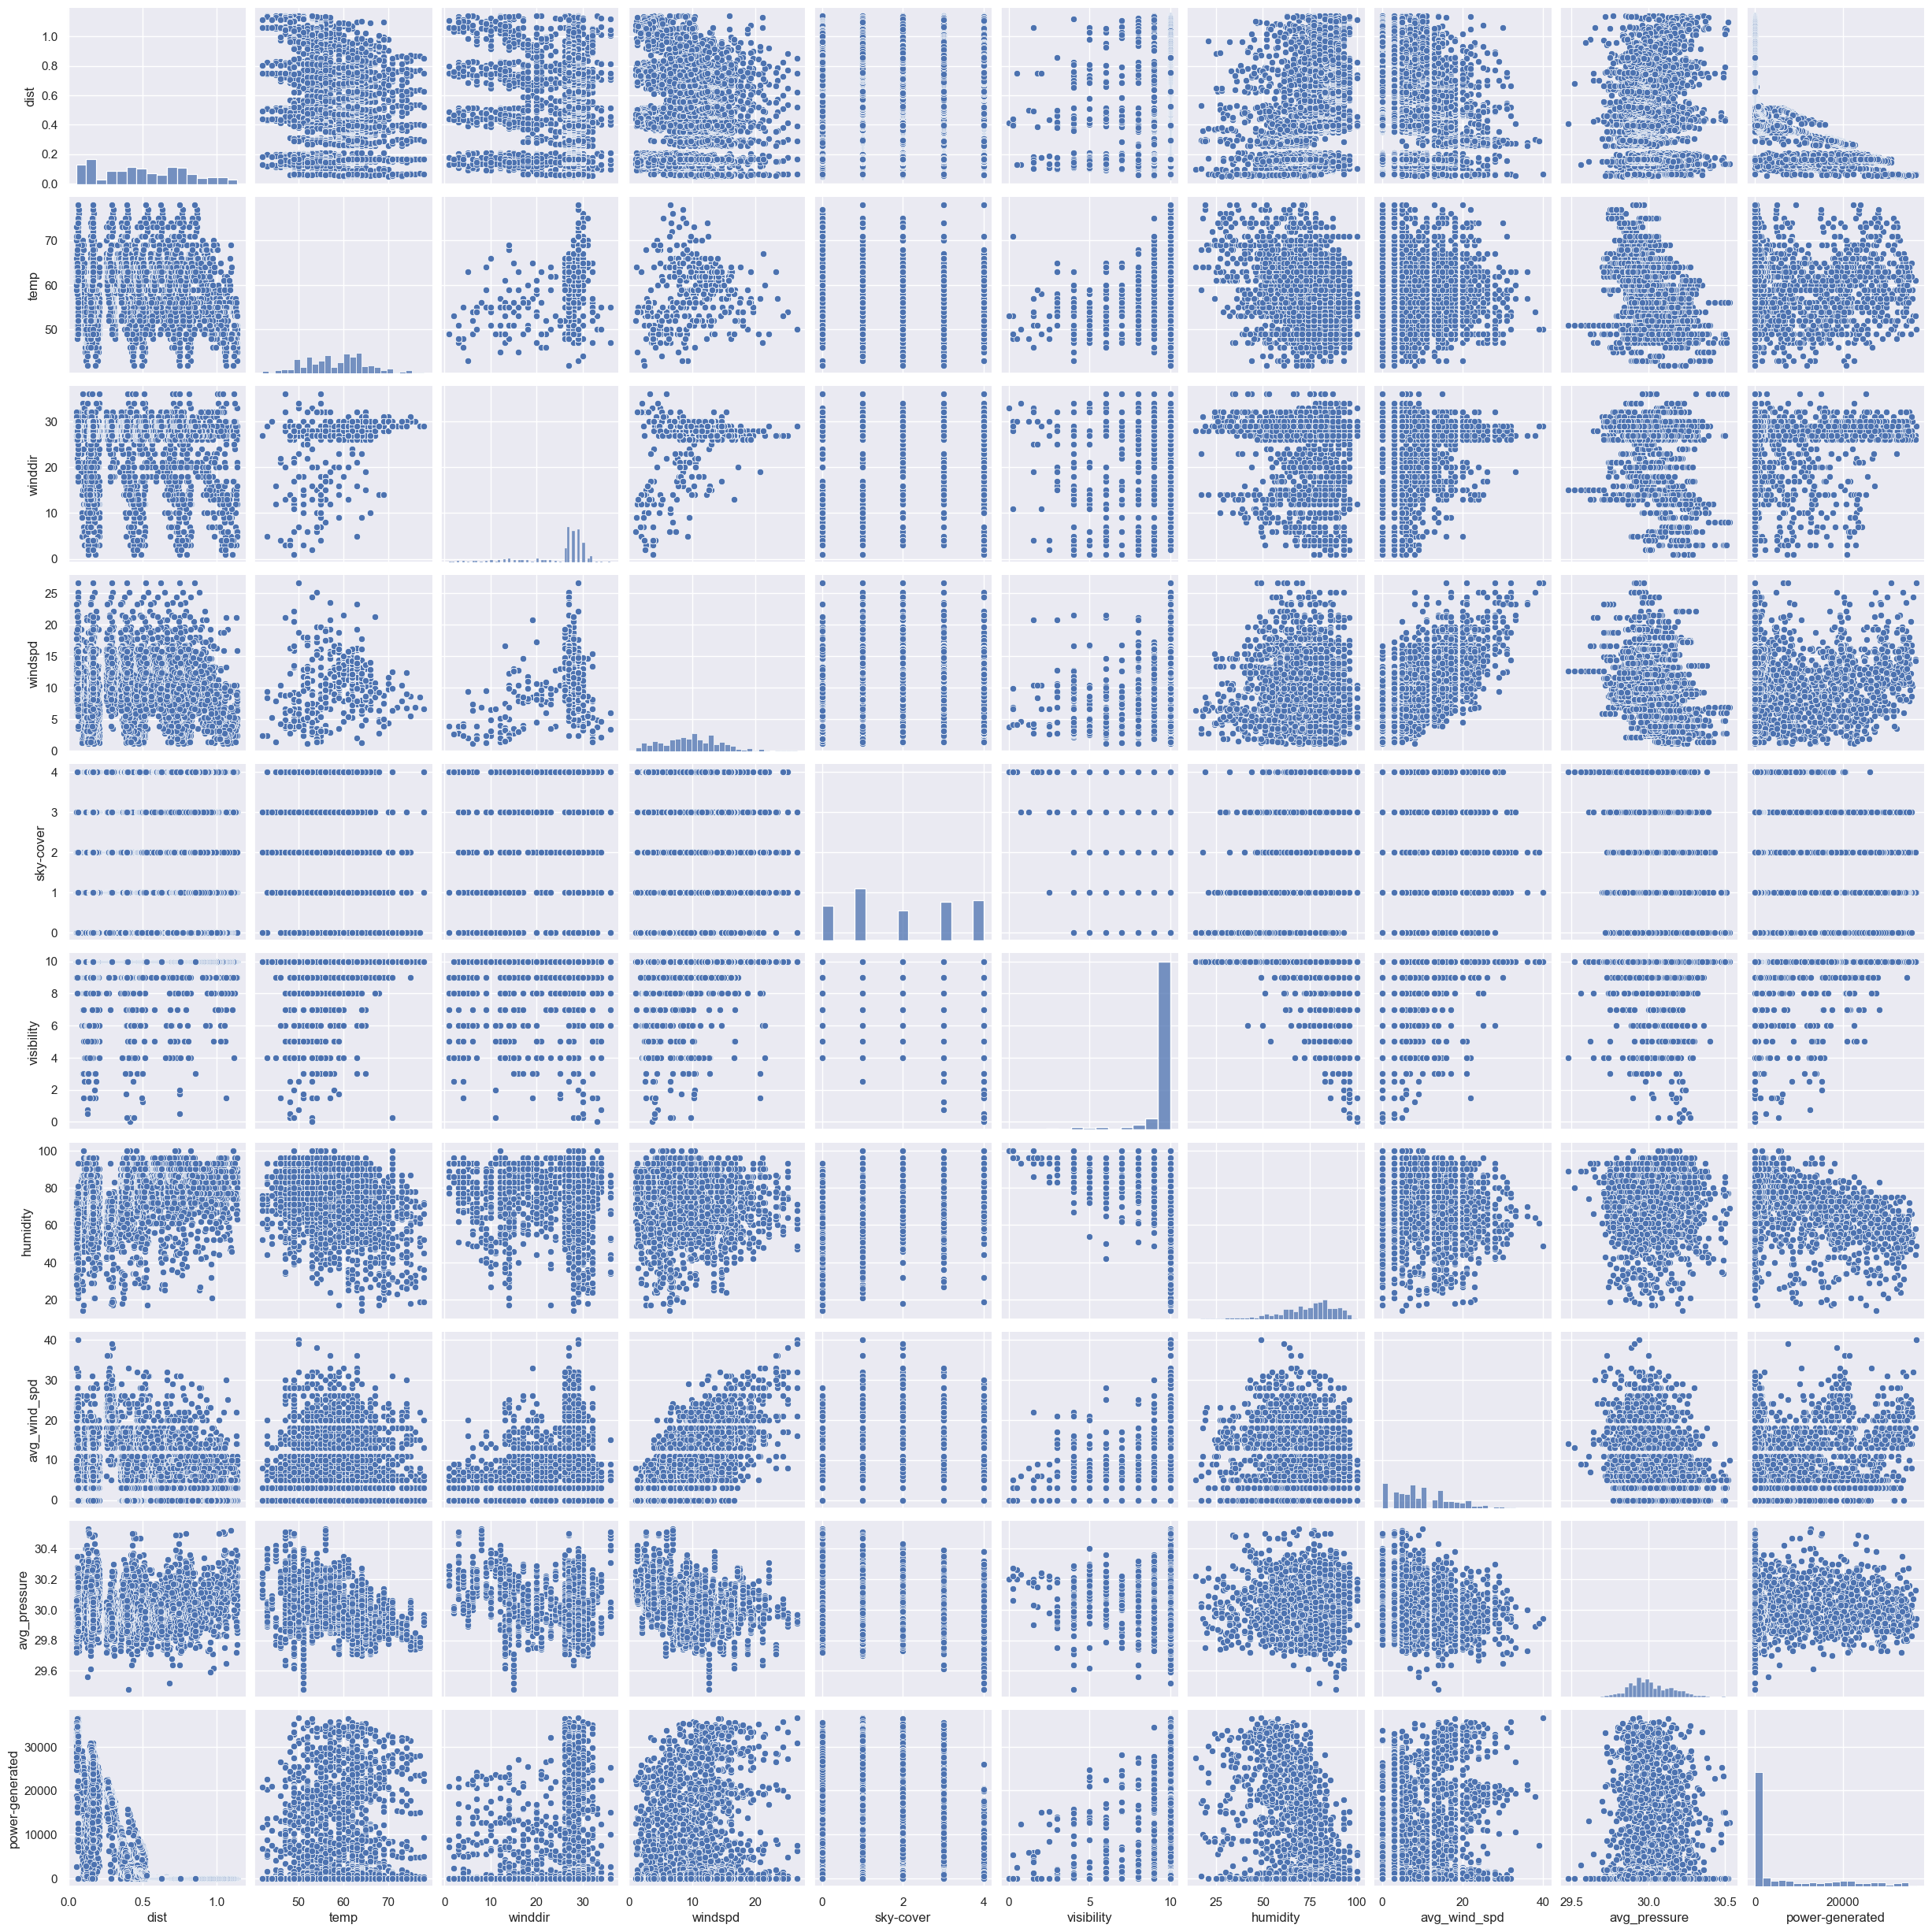

In [55]:
sns.pairplot(df)

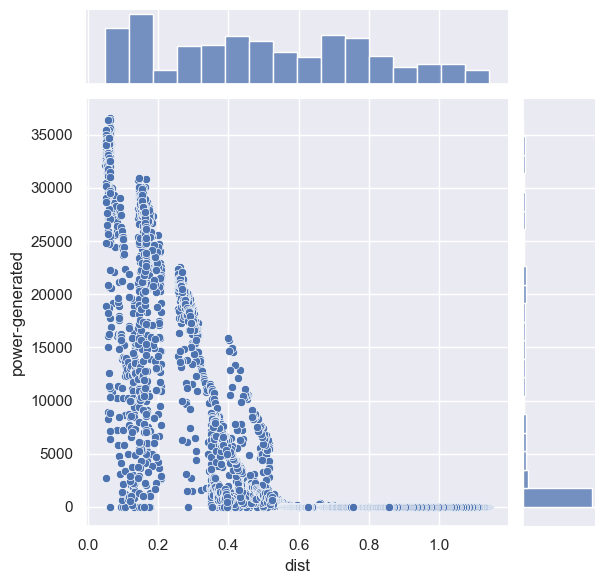

In [14]:
sns.jointplot(y='power-generated',x='dist',data=df)

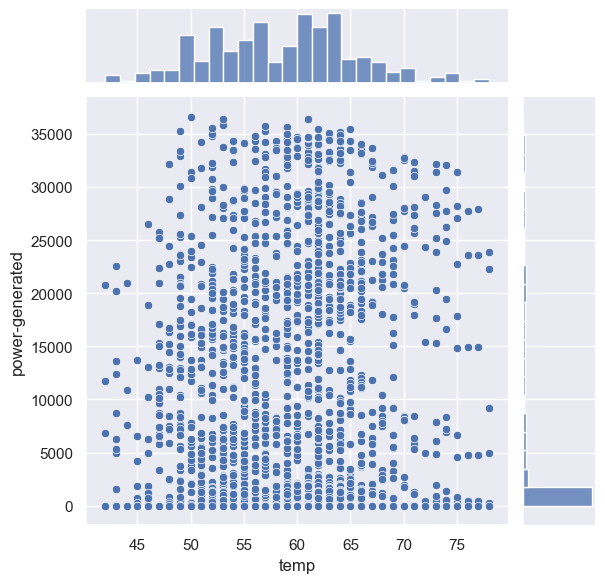

In [15]:
sns.jointplot(y='power-generated',x='temp',data=df)

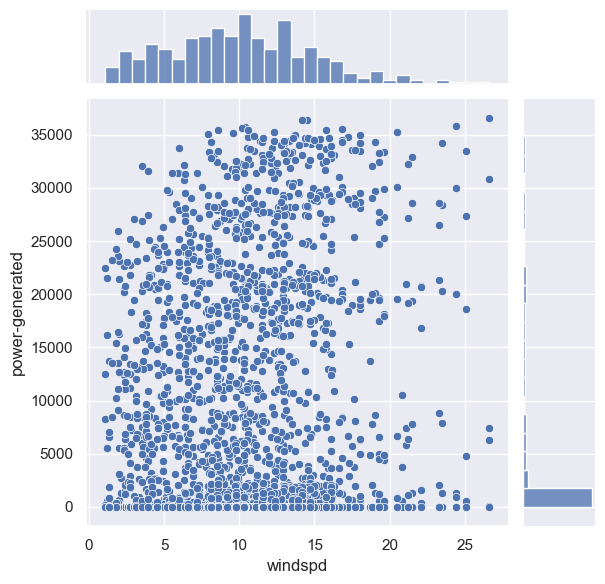

In [16]:
sns.jointplot(y='power-generated',x='windspd',data=df)

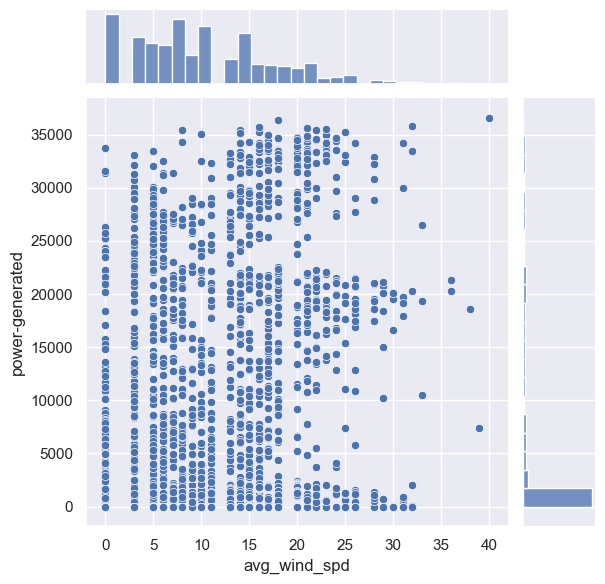

In [17]:
sns.jointplot(y='power-generated',x='avg_wind_spd',data=df)

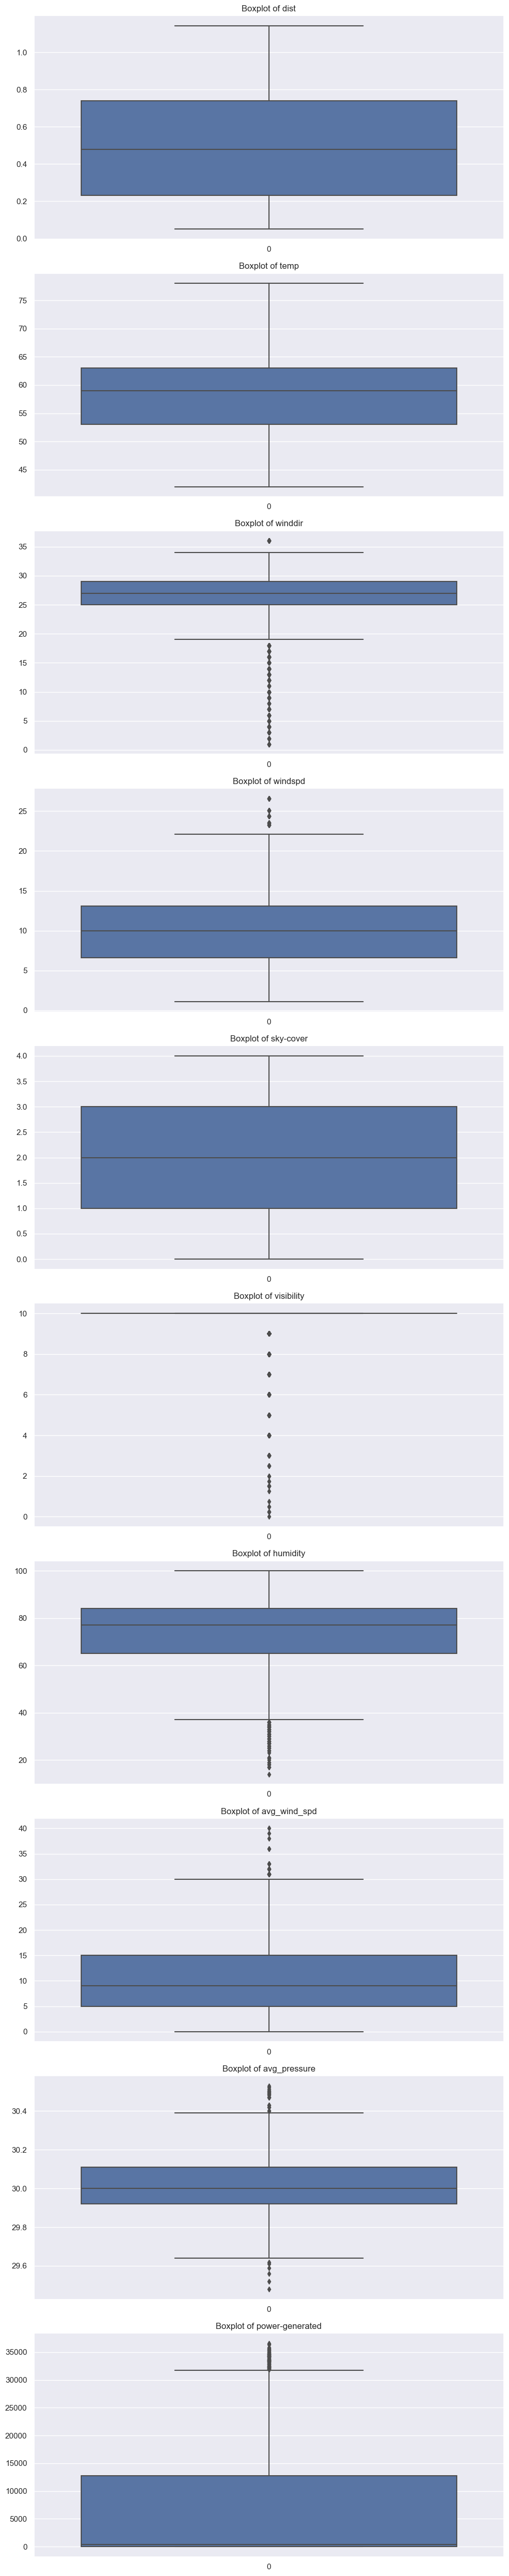

In [18]:
# Get columns of DataFrame
columns = df.columns

# Create a figure with subplots
fig, axes = plt.subplots(nrows=len(columns), ncols=1, figsize=(10, 5 * len(columns)))

# Iterate through columns and plot boxplot for each column
for i, var in enumerate(columns):
    sns.boxplot(data=df[var], ax=axes[i])
    axes[i].set_title(f'Boxplot of {var}')

# Adjust layout
plt.tight_layout()
plt.show()

In [19]:
# scaler=StandardScaler()

# df_scaled=pd.DataFrame(scaler.fit_transform(df1),columns=df1.columns)
# df_scaled['visibility'].unique()

<Axes: >

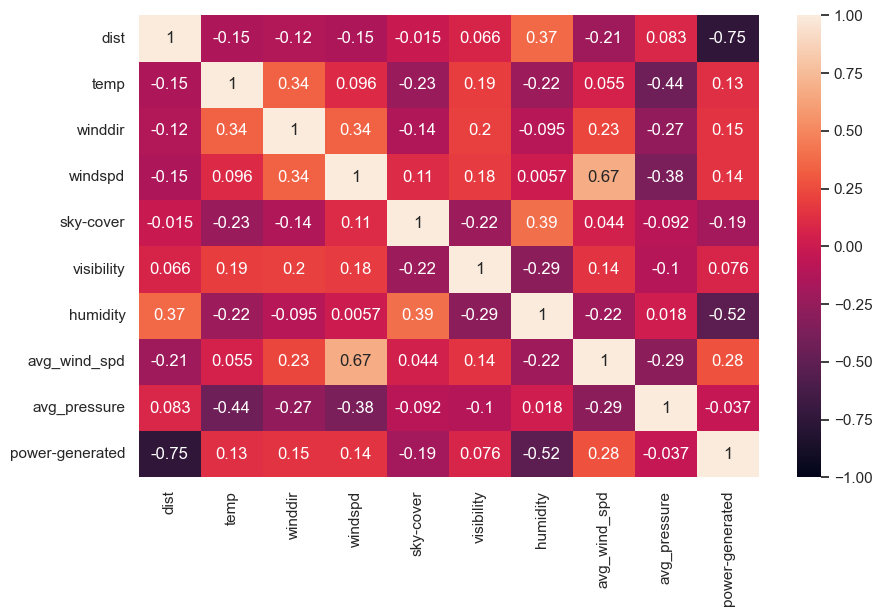

In [54]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1)

In [21]:
cols=df.columns

# #fig,axes=plt.subplots(nrows=len(cols),ncols=1,figsize=(10,5*len(cols)))
# #plt.figure(figsize=(10,5))
# for i, var in enumerate(cols,1):
#     plt.subplot(4,3,i)
#     sns.boxplot(data=df_scaled[var])
#     plt.title(var)
#     #axes[i].set_title(f'The Boxplot of {var}')
    
# plt.tight_layout()
# plt.show()

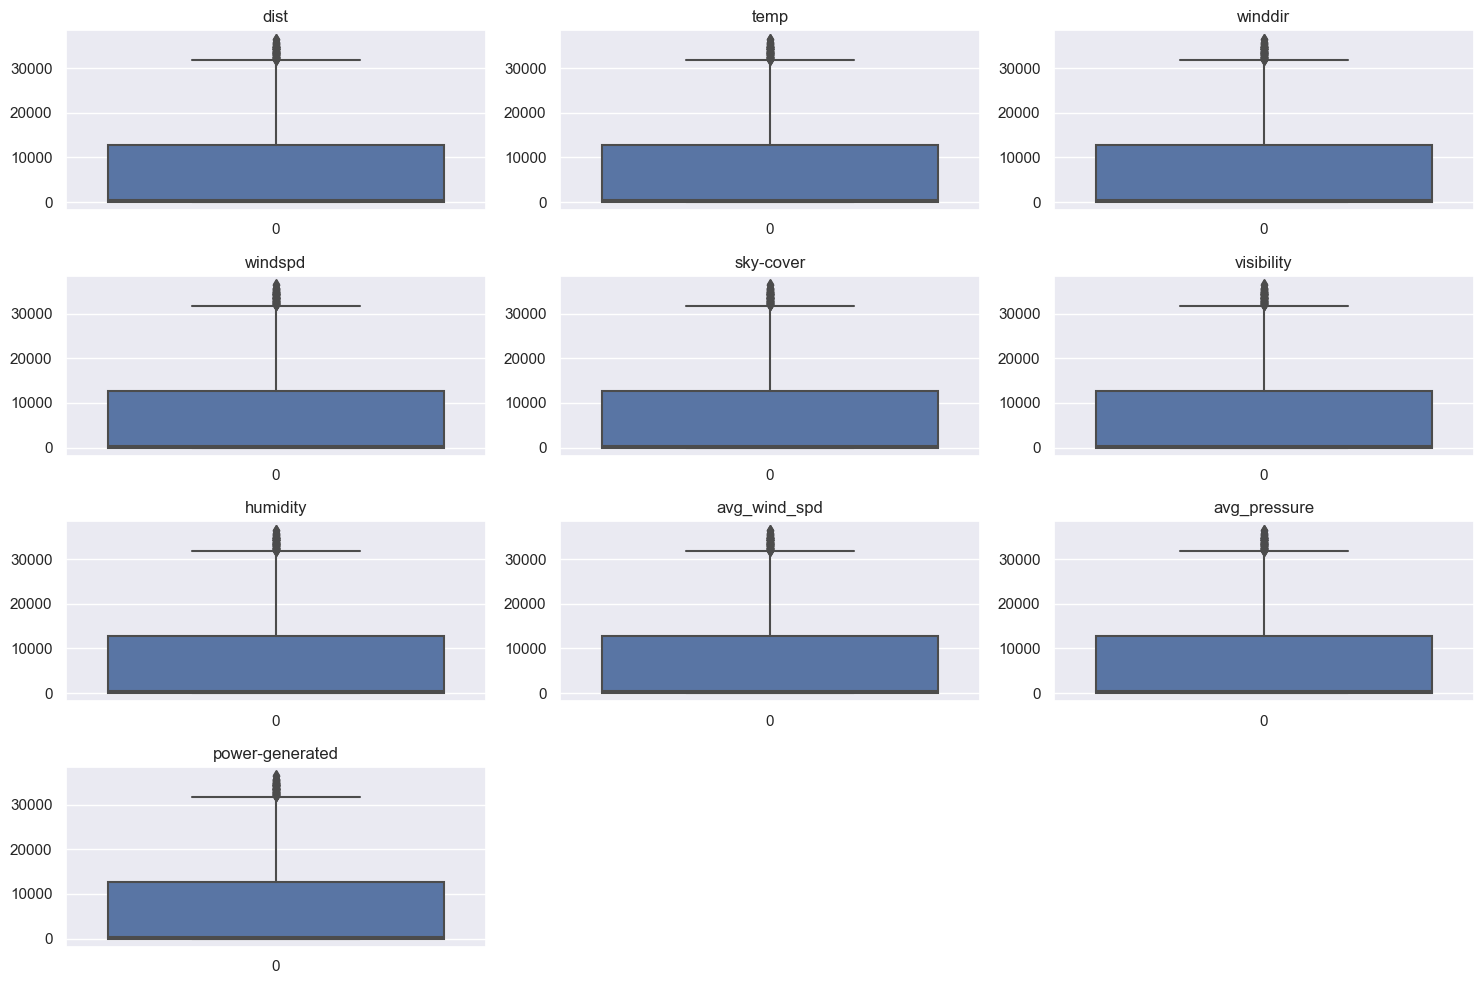

In [22]:
# boxplot of vairables.
plt.figure(figsize=(15,10))

for i,cols in enumerate(df.columns,1):
    plt.subplot(4,3,i)
    sns.boxplot(data=df[var])
    plt.title(cols)
    
plt.tight_layout()
plt.show()

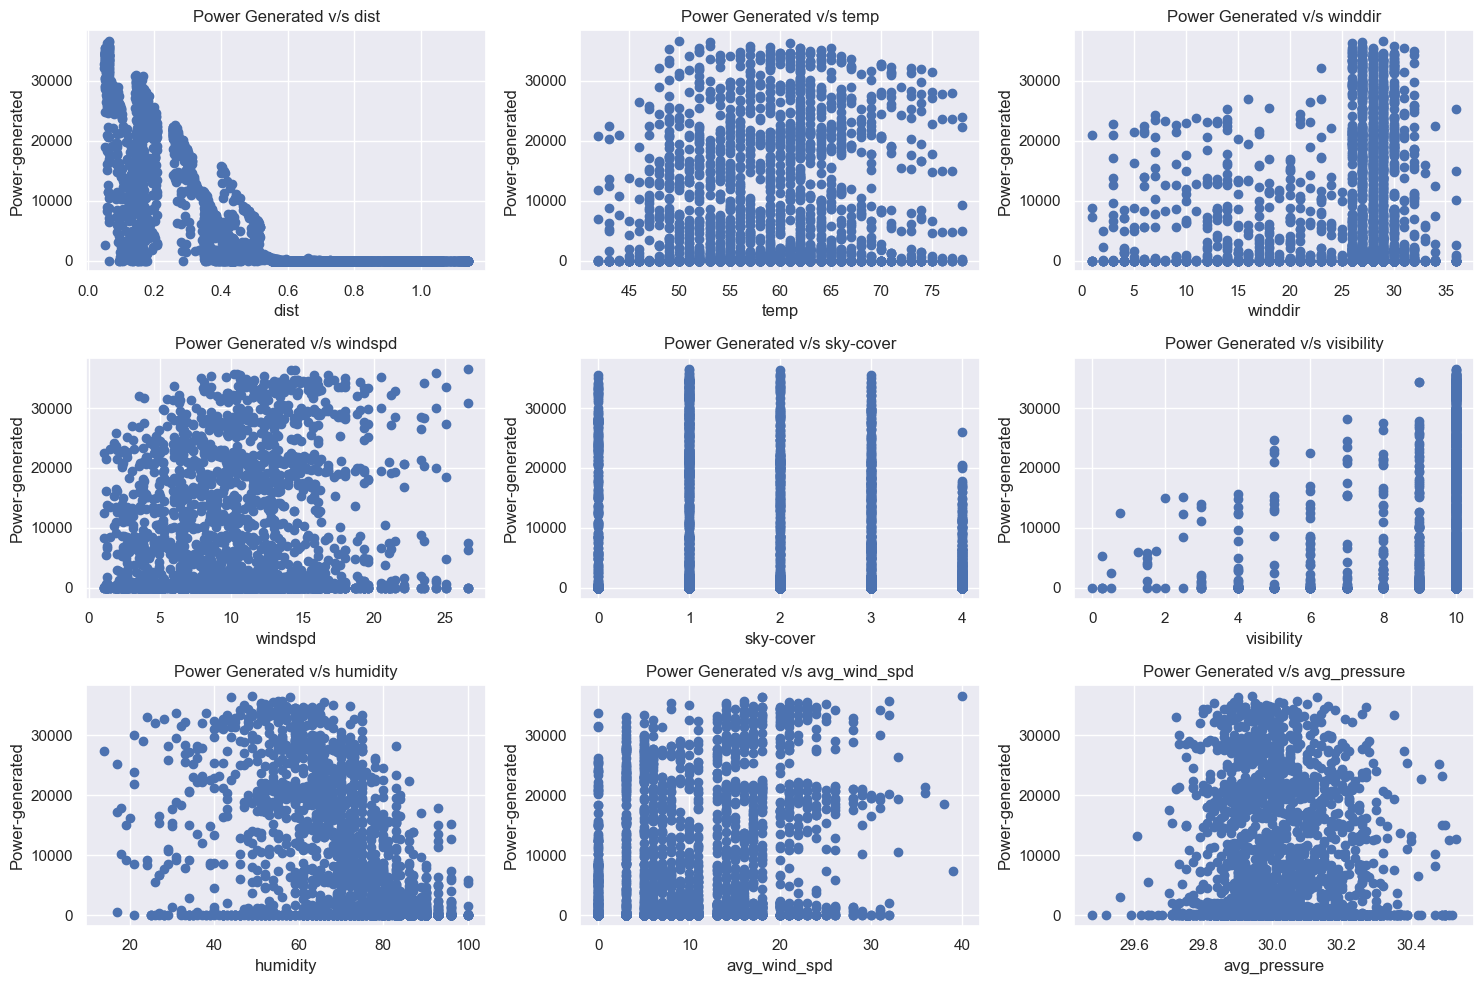

In [23]:
# Scatter plot to visualise relation with target

plt.figure(figsize=(15,10))

for i,var in enumerate(df.columns.drop('power-generated'),1):
    plt.subplot(3,3,i)
    plt.scatter(df[var],df['power-generated'])
    plt.title(f'Power Generated v/s {var}')
    plt.xlabel(var)
    plt.ylabel('Power-generated')
    
plt.tight_layout()
plt.show()   

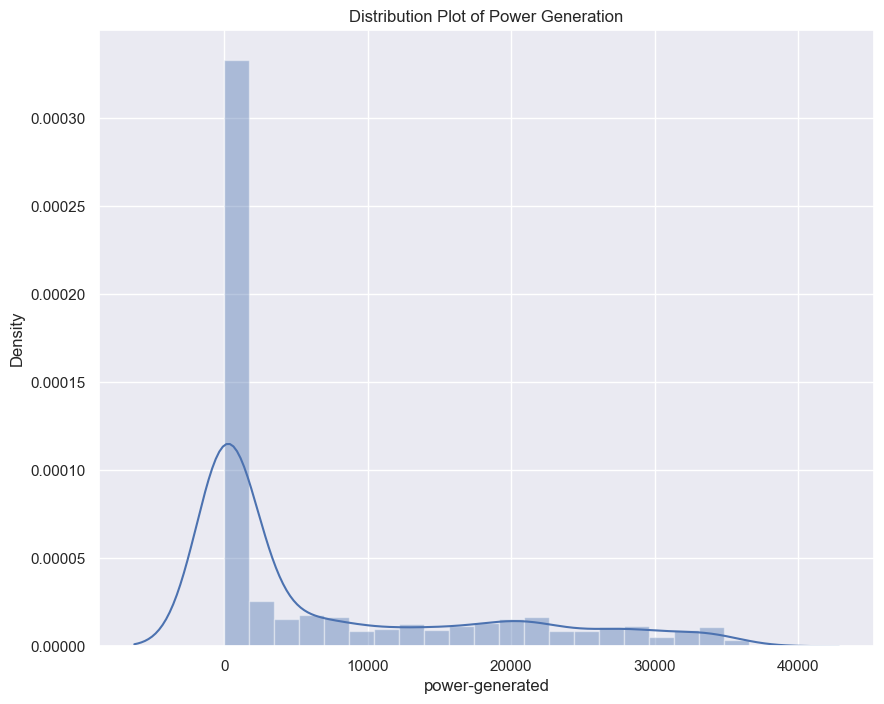

In [24]:
# Distribution plot for Target: Power-Generated

plt.figure(figsize=(10,8))
sns.distplot(df['power-generated'],kde=True)
plt.title('Distribution Plot of Power Generation')
plt.show()

### VIF

In [25]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

In [26]:
X_constant=sm.add_constant(df)   # constant added
X_constant.shape

(2919, 11)

In [27]:
# Calculate VIF
vif=pd.DataFrame()
vif['Vif Factor']=[variance_inflation_factor(X_constant.values,i)for i in range(X_constant.shape[1])]
vif['features']=X_constant.columns
vif                                    # Multicolinearity is not a issue as VIF < 5 for all features.

,Vif Factor,features
0,70752.850496,const
1,2.532943,dist
2,1.521758,temp
3,1.306678,winddir
4,2.240812,windspd
5,1.388552,sky-cover
6,1.247034,visibility
7,1.821742,humidity
8,2.092820,avg_wind_spd
9,1.509385,avg_pressure


### Model Building

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor,BaggingRegressor,GradientBoostingRegressor,RandomForestRegressor,StackingRegressor
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
from sklearn.preprocessing import StandardScaler


In [ ]:
# Train Test Split

X = df.drop('power-generated',axis=1)     # Features
y = df['power-generated']                 # Targets

In [30]:
# Standardizing the dataset after spliting the data.
scaler=StandardScaler()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)


In [31]:
# Storing the models and their predictors.

models = {
    "LinearRegression":LinearRegression(),
    "DecisionTreeRegressor":DecisionTreeRegressor(),
    "AdaBoostRegressor":AdaBoostRegressor(),
    "BaggingRegressor":BaggingRegressor(),
    "GradientBoostRegressor":GradientBoostingRegressor(),
    "RandomForestRegressor":RandomForestRegressor(),
    "Ridge":Ridge(alpha=0.1),
    "Lasso":Lasso(alpha=0.1)
}

In [32]:
# Storing the results and predictions after training the models

results={}

for i,model in models.items():
    
    #Train the model
    model.fit(X_train,y_train)
    
    # Making the predictions
    y_pred=model.predict(X_test)
    
    # Calculate the matrices
    mse=mean_squared_error(y_test,y_pred)
    mae=mean_absolute_error(y_test,y_pred)
    r2score=r2_score(y_test,y_pred)
    
    # Storing the results
    results[i]={
        "mean squared_error":mse,
        "mean absolute_error":mae,
        "r2score":r2score
    }
    
    
# Making a dataframe for better visualisation    
results_df = pd.DataFrame(results).T 
display(results_df)

,mean squared_error,mean absolute_error,r2score
LinearRegression,4.147962e+07,5099.810801,0.622966
DecisionTreeRegressor,1.993035e+07,1839.207192,0.818841
AdaBoostRegressor,1.675013e+07,2475.873074,0.847748
BaggingRegressor,1.163086e+07,1570.521575,0.894280
GradientBoostRegressor,8.916060e+06,1636.285067,0.918956
RandomForestRegressor,1.054627e+07,1542.054812,0.904138
Ridge,4.147984e+07,5099.797128,0.622964
Lasso,4.147952e+07,5099.797393,0.622967


###  Analysis

- **Lowest MSE**: The**GradientBoostRegressor** has the lowest MSE of **8.911361 ×$10^6**,indicating the smallest average squared error among the models.
- **Lowest MAE**: The **RandomForestRegressor** has the lowest MAE of **1511.3350**, indicating the smallest average absolute error.
- **Highest R² Score**: The **GradientBoostRegressor** has the highest R² score of **0.918999**, indicating that it explains the most variance in the target variable.

- **Conclusion**: The **GradientBoostRegressor** appears to be the best overall model because it has the lowest MSE, a very competitive MAE, and the highest R² score.

In [33]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from scipy.stats import uniform, randint  # Importing randint and uniform
from sklearn import metrics

In [34]:
# Define the model
model = GradientBoostingRegressor()

# Define the parameter grid
param_dist = {
    'n_estimators': randint(100, 200),  # Number of boosting stages to be run
    'learning_rate': uniform(0.01, 0.1),  # Step size for each iteration
    'max_depth': randint(3, 4),  # Maximum depth of the trees
    'min_samples_split': randint(2, 5),  # Minimum number of samples required to split an internal node
    'min_samples_leaf': randint(1, 2)  # Minimum number of samples required to be at a leaf node
}


# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=100,  # Number of different parameter settings to sample
    scoring='neg_mean_squared_error',  # Use negative MSE for scoring
    cv=5,  # Number of cross-validation folds
    random_state=42,
    n_jobs=-1  # Use all available cores
)


In [35]:
# Fit the model (i.e. GradientBoostingRegressor)
random_search.fit(X_train, y_train)


RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x00000233192DD050>,
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000233191B9110>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002331968E950>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000023317F02E10>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000023319A2CD10>},
                   random_state=42, scoring='neg_mean_squared_error')

In [36]:
# Get the best parameters and the best score
best_params = random_search.best_params_
best_score = -random_search.best_score_  # Negate because we used negative MSE

#Printing the best parameters and score

print(f"Best Parameters: {best_params}")
print(f"Best Score (MSE): {best_score:.4f}")

Best Parameters: {'learning_rate': 0.07451727904094499, 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 132}
Best Score (MSE): 9482679.0650


In [37]:
# Evaluate the model with the best parameters
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse=np.sqrt(mse)                             # Root mean square error


In [38]:
print(f"Test MSE: {mse:.4f}")
print(f"Test MAE: {mae:.4f}")
print(f"Test RMSE: {rmse:.4f}")
print(f"Test R² Score: {r2:.4f}")

Test MSE: 8823612.7953
Test MAE: 1595.5526
Test RMSE: 2970.4567
Test R² Score: 0.9198


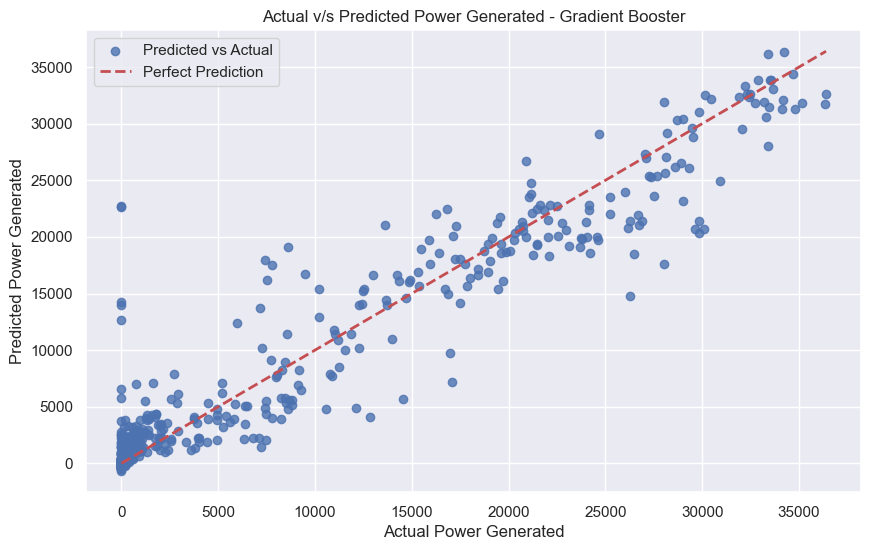

In [39]:
# Plot between actual and predicted values

plt.figure(figsize=(10,6))
plt.scatter(y_test,y_pred,alpha=0.8,label='Predicted vs Actual')
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],'--r',linewidth=2,label='Perfect Prediction')
plt.xlabel('Actual Power Generated')
plt.ylabel('Predicted Power Generated')
plt.title('Actual v/s Predicted Power Generated - Gradient Booster')
plt.legend()
plt.grid(True)
plt.show()

Text(0.5, 1.0, 'Residuals vs. Fitted Values')

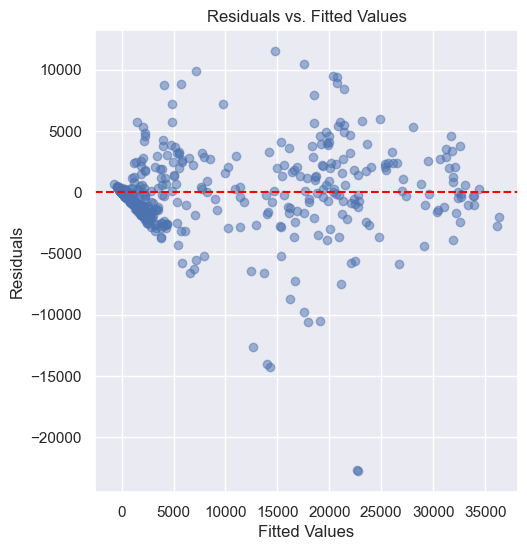

In [40]:
# Calculate residuals
residuals = y_test - y_pred

# Plot Residuals vs. Fitted Values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')

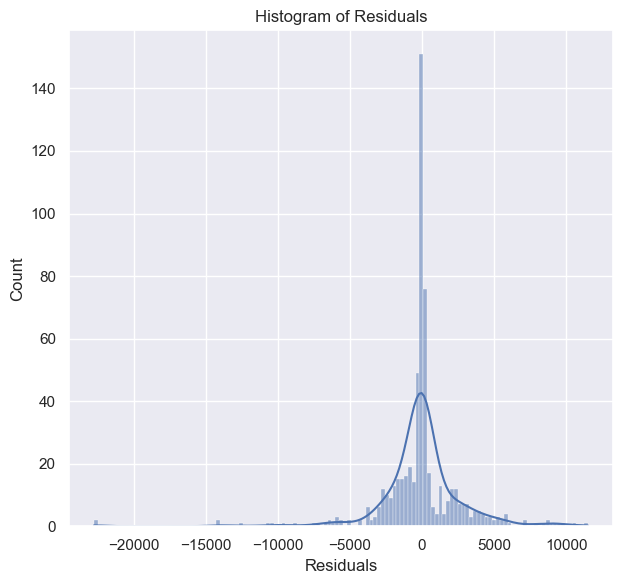

In [41]:
# Plot Histogram of Residuals
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 2)
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.title('Histogram of Residuals')

plt.tight_layout()
plt.show()

In [42]:
scaler_X = StandardScaler()
scaler_y = StandardScaler()

# Fit the scaler on the training data and transform
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

# Reshape y for scaling and scale it
y_train_reshaped = y_train.values.reshape(-1, 1)
y_train_scaled = scaler_y.fit_transform(y_train_reshaped)


In [43]:
# importing streamlit
#! pip install streamlit
import pickle
import streamlit as st

In [44]:
# Save the model and scalers
with open('gradient_boosting_model.sav', 'wb') as f:
    pickle.dump(best_model, f)
    
with open('scaler_X.sav', 'wb') as f:
    pickle.dump(scaler_X, f)
    
with open('scaler_y.sav', 'wb') as f:
    pickle.dump(scaler_y, f)

In [45]:
# predicted=pd.DataFrame(X_test,columns=X.columns)
# #predicted=X_test
# predicted['Expected Power Generated']=y
# predicted['Predicted Power Generated']=y_pred
# predicted.head(20)

In [46]:
# from IPython.display import display, HTML

# # Print the results in bold
# for model_name, metrics in results.items():
#     display(HTML(f"<b>Model: {model_name}</b><br>"
#                  f"  Mean Squared Error: {metrics['mean squared_error']:.4f}<br>"
#                  f"  Mean Absolute Error: {metrics['mean absolute_error']:.4f}<br>"
#                  f"  R2 Score: {metrics['r2score']:.4f}<br>"))

In [47]:
# plt.figure(figsize=(7,4))
# plt.hist(residuals,bins=20)
# import statsmodels.api as sm
# qqplot = sm.qqplot(residuals,line='q')
# plt.title("Normal Q-Q plot of residuals")
# plt.show()

In [48]:
# Printing the results

# for name,metrice in results.items():
#     print(f"Model:{name}")
#     print(f"Mean Square Error: {mse}")
#     print(f"Mean Absolute Error: {mae}")
#     print(f"r2 Score: {r2score}")
#     print("")
    
      
        

# df_scaled=pd.DataFrame(scaler.fit_transform(df1),columns=df1.columns)
# df_scaled['visibility'].unique()